In [5]:
import netCDF4
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from matplotlib.colors import LinearSegmentedColormap
import csv, sys, pdb, time, math

In [3]:
file_o00 = "/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o00_01.nc"

In [4]:
rootgrp = netCDF4.Dataset(file_o00, "r", format="NETCDF4")

In [5]:
# print(rootgrp)
# print(rootgrp.data_model)
# print(rootgrp.dimensions)
# print(len(rootgrp.dimensions.get("lat")))
# print(len(rootgrp.dimensions.get("lon")))

# get the dimensions
latSize = rootgrp.dimensions.get("lat").size
lonSize = rootgrp.dimensions.get("lon").size
# print(latSize)
# print(lonSize)

# declare arrays
grid = np.zeros((latSize, lonSize))
latGrid = np.zeros((latSize))
lonGrid = np.zeros((lonSize))

#get the dimension variables
ltVar = rootgrp.variables.get('lat')
lnVar = rootgrp.variables.get('lon')
# print(ltVar)
# print(lnVar)

#fill arrays
for lt in range(latSize):
    latGrid[lt] = ltVar[lt]
for ln in range(lonSize):
    lonGrid[ln] = lnVar[ln]
# print(latGrid)
# print(lonGrid)

var_name = rootgrp.variables.get('o_an').long_name # a Variable Object
print(var_name)

var_vals = rootgrp.variables.get('o_an')

# Fill numpy array for the O2 grid
for lt in range(latSize):
    for ln in range(lonSize):
#         print (latSize - lt - 1, end="\n")
        grid[latSize-lt-1][ln] = var_vals[0, 0, lt, ln]
#         print(lt, ln, grid[lt][ln])


Objectively analyzed mean fields for volume_fraction_of_oxygen_in_sea_water at standard depth levels.


/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Warning: converting a masked element to nan.


In [6]:
print(np.nanmax(grid))
print(np.nanmin(grid))

9.638262748718262
4.0857415199279785


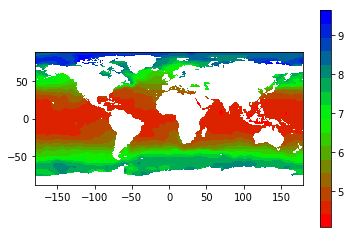

In [7]:
# print(grid.mean)
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)] 
cm = LinearSegmentedColormap.from_list("O2 Global", colors, 16)
plt.imshow(grid, extent=(lonGrid.min(), lonGrid.max(), latGrid.min(), latGrid.max()),
          interpolation='nearest', cmap=cm) #LRBT
plt.colorbar(cmap=cm)
plt.show()

In [8]:
def summarizeWOAFile(inFile):
    rootgrp = netCDF4.Dataset(inFile, "r", format="NETCDF4")
    print("Root Group: ", rootgrp.variables, end="\n")
    print("Data Model: ", rootgrp.data_model, end="\n")
    print("Dimensions:", rootgrp.dimensions, end="\n")
#     print(len(rootgrp.dimensions.get("lat")))
#     print(len(rootgrp.dimensions.get("lon")))
#   Get the Range of the 'o_an' variable
    var_vals = rootgrp.variables.get('o_an')
    print("#######", var_vals)


In [9]:
summarizeWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o01_01.nc")

Root Group:  OrderedDict([('crs', <class 'netCDF4._netCDF4.Variable'>
int32 crs()
    grid_mapping_name: latitude_longitude
    epsg_code: EPSG:4326
    longitude_of_prime_meridian: 0.0
    semi_major_axis: 6378137.0
    inverse_flattening: 298.25723
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
), ('lat', <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lat_bnds', <class 'netCDF4._netCDF4.Variable'>
float32 lat_bnds(lat, nbounds)
    comment: latitude bounds
unlimited dimensions: 
current shape = (180, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lon', <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X


In [17]:
def plotWOAFile(inGrid, title):
    colors = [(0.765, 0.765, 0.074), (1, 1, 1), (0.514, 0.074, 1)] 
    cm = LinearSegmentedColormap.from_list("O2 Global", colors, 16)
    plt.imshow(inGrid, extent=(lonGrid.min(), lonGrid.max(), latGrid.min(), latGrid.max()),
          interpolation='nearest', cmap=cm, vmin=0.2, vmax=8.2) #LRBT
#     plt.xlim(0, -120)
#     plt.ylim(40, 50)
    plt.colorbar(cmap=cm)
    plt.title(title)
    plt.show()

In [13]:
gridAnnual,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o00_01.nc","o_an", 0)
gridJan,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o01_01.nc","o_an", 0)
gridFeb,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o02_01.nc","o_an", 0)
gridMar,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o03_01.nc","o_an", 0)
gridApr,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o04_01.nc","o_an", 0)
gridMay,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o05_01.nc","o_an", 0)
gridJun,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o06_01.nc","o_an", 0)
gridJul,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o07_01.nc","o_an", 0)
gridAug,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o08_01.nc","o_an", 0)
gridSep,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o09_01.nc","o_an", 0)
gridOct,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o10_01.nc","o_an", 0)
gridNov,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o11_01.nc","o_an", 0)
gridDec,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o12_01.nc","o_an", 0)
gridSpr,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o13_01.nc","o_an", 0)
gridSum,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o14_01.nc","o_an", 0)
gridAut,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o15_01.nc","o_an", 0)
gridWin,gLatGrid,gLonGrid = gridWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o16_01.nc","o_an", 0)

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Warning: converting a masked element to nan.


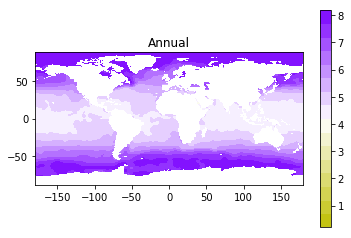

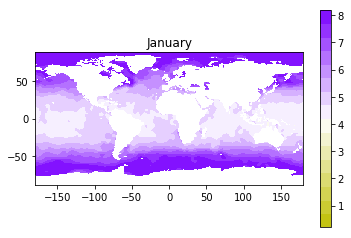

In [18]:
#The January average period
plotWOAFile(gridAnnual, "Annual")
plotWOAFile(gridJan, "January")


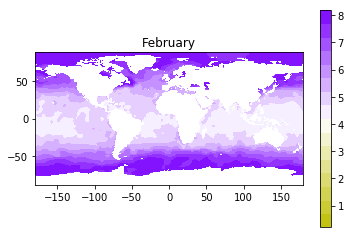

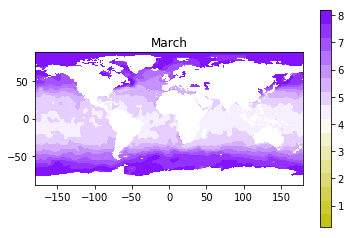

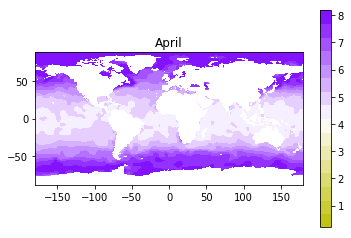

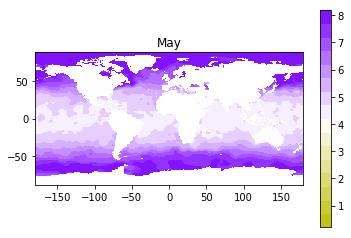

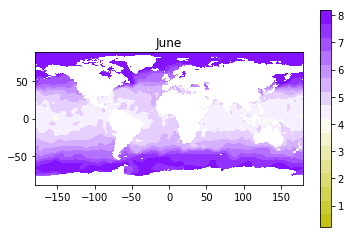

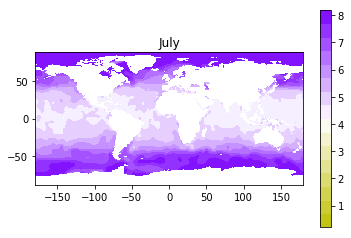

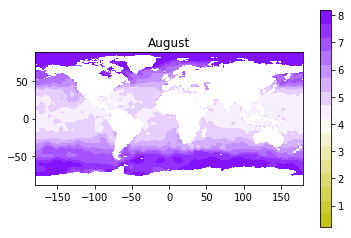

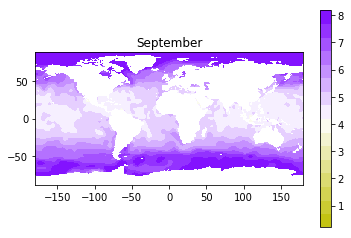

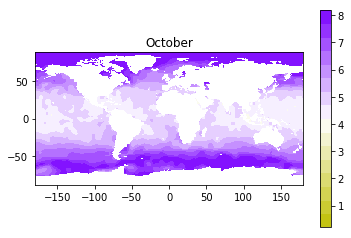

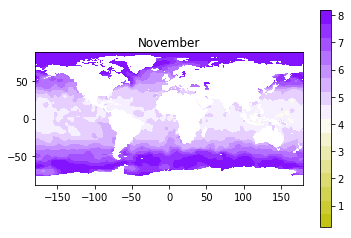

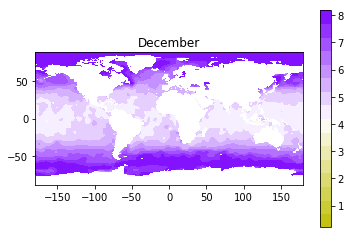

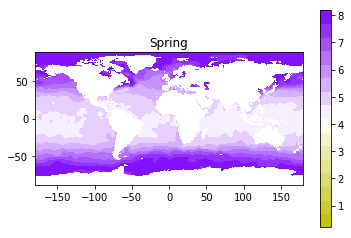

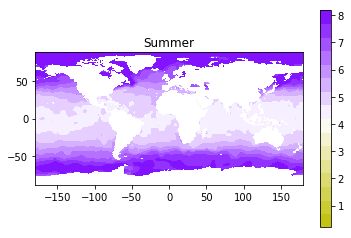

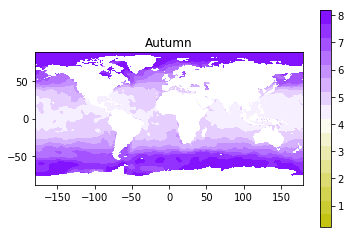

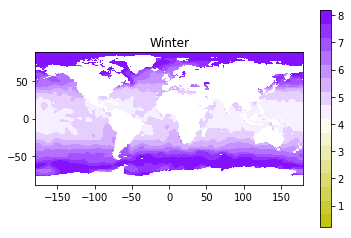

In [19]:
plotWOAFile(gridFeb, "February")
plotWOAFile(gridMar, "March")
plotWOAFile(gridApr, "April")
plotWOAFile(gridMay, "May")
plotWOAFile(gridJun, "June")
plotWOAFile(gridJul, "July")
plotWOAFile(gridAug, "August")
plotWOAFile(gridSep, "September")
plotWOAFile(gridOct, "October")
plotWOAFile(gridNov, "November")
plotWOAFile(gridDec, "December")
plotWOAFile(gridSpr, "Spring")
plotWOAFile(gridSum, "Summer")
plotWOAFile(gridAut, "Autumn")
plotWOAFile(gridWin, "Winter")

In [20]:
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o13_01.nc","o_an", 30)

TypeError: plotWOAFile() takes 2 positional arguments but 3 were given

In [13]:
def gridWOAFile(inFile, varToPlot, level):
    # inFile 
    rootgrp = netCDF4.Dataset(inFile, "r", format="NETCDF4")
    # get the dimensions
    latSize = rootgrp.dimensions.get("lat").size
    lonSize = rootgrp.dimensions.get("lon").size

    # declare arrays
    grid = np.zeros((latSize, lonSize))
    latGrid = np.zeros((latSize))
    lonGrid = np.zeros((lonSize))

    #get the dimension variables
    ltVar = rootgrp.variables.get('lat')
    lnVar = rootgrp.variables.get('lon')
    
    #fill arrays
    for lt in range(latSize):
        latGrid[lt] = ltVar[lt]
    for ln in range(lonSize):
        lonGrid[ln] = lnVar[ln]

    var_name = rootgrp.variables.get(varToPlot).long_name # a Variable Object
    var_vals = rootgrp.variables.get(varToPlot)

    # Fill numpy array for the O2 grid
    for lt in range(latSize):
        for ln in range(lonSize):
            grid[latSize-lt-1][ln] = var_vals[0, level, lt, ln]
    return grid,latGrid,lonGrid

In [14]:
# test of findBuoyLoc
# print(gLatGrid)
fLat,fLon = findBuoyLoc(gridAnnual,gLatGrid,gLonGrid, 47.97, -125.37)
print(fLat,fLon)
print(gridAnnual[fLat, fLon])

NameError: name 'gridAnnual' is not defined

In [15]:
def findBuoyLoc(inGrid, latGrid, lonGrid, lat, lon):
    # need the axes vectors
    absLatDiff = abs(latGrid - lat)
    absLonDiff = abs(lonGrid - lon)
#     clsLat = np.where(absLatDiff == np.min(absLatDiff))
#     clsLon = np.where(absLonDiff == np.min(absLonDiff))
    clsLat = np.argmin(absLatDiff)
    clsLon = np.argmin(absLonDiff)
    return clsLat,clsLon

In [16]:

fLat,fLon = findBuoyLoc(gridAnnual,gLatGrid,gLonGrid, 47.97, -125.37)
print(fLat,fLon)
print(gridAnnual[fLat, fLon])

NameError: name 'gridAnnual' is not defined

In [17]:
buoy_file = "/Users/oz/Downloads/Buoy_Locations.csv"

In [18]:
print(buoy_file)

/Users/oz/Downloads/Buoy_Locations.csv


In [19]:
inFile = open(buoy_file, 'rU')
reader = csv.reader(inFile, delimiter=",")  #this can be comma or tab delimited \t
d = list(reader)
for lc,l in enumerate(d):
    # skip the first two lines or just one line for large scale cryuises
    if lc < 2:
        continue
    loc = l[0]
    lat = l[1]
    lon = l[2]
#     print(lat)
#     print(type(lat))
    fLat,fLon = findBuoyLoc(gridAnnual,gLatGrid,gLonGrid, float(lat), float(lon))
    print(loc, " ", lat, lon, gridAnnual[fLat, fLon])
    
# print(d)
    

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


NameError: name 'gridAnnual' is not defined